        Date    Open      High      Low    Close  Prev. Close   Change   \
0  13-Dec-22  13.3175  13.5775  11.4325  12.8825       13.3175    -0.44   
1  14-Dec-22  12.8825  13.0825  11.5275  12.8850       12.8825     0.00   
2  15-Dec-22  12.8850  13.8825  12.5875  13.7325       12.8850     0.85   
3  16-Dec-22  13.7325  14.2200  12.4925  14.0700       13.7325     0.34   
4  19-Dec-22  14.0700  14.4875  13.5000  13.5525       14.0700    -0.52   

   % Change   
0      -3.27  
1       0.02  
2       6.58  
3       2.46  
4      -3.68  


<ipython-input-42-45a16d7c0904>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


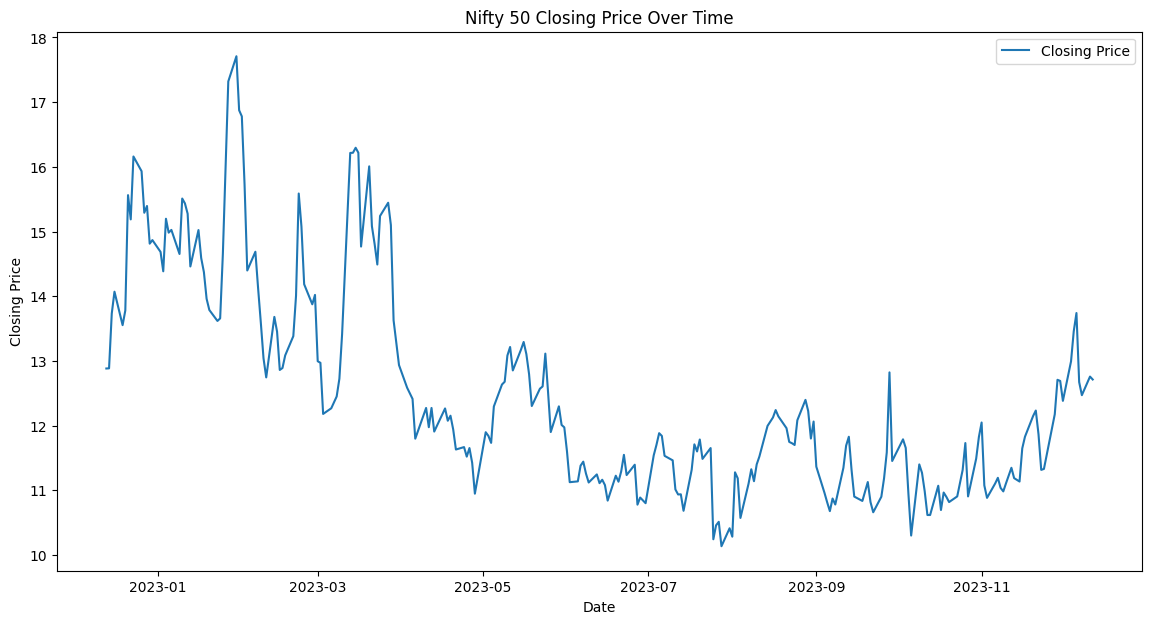

Epoch 1/10
220/220 - 4s - loss: 0.0219 - 4s/epoch - 19ms/step
Epoch 2/10
220/220 - 2s - loss: 0.0135 - 2s/epoch - 9ms/step
Epoch 3/10
220/220 - 2s - loss: 0.0110 - 2s/epoch - 8ms/step
Epoch 4/10
220/220 - 2s - loss: 0.0100 - 2s/epoch - 7ms/step
Epoch 5/10
220/220 - 2s - loss: 0.0080 - 2s/epoch - 7ms/step
Epoch 6/10
220/220 - 2s - loss: 0.0071 - 2s/epoch - 7ms/step
Epoch 7/10
220/220 - 2s - loss: 0.0067 - 2s/epoch - 7ms/step
Epoch 8/10
220/220 - 2s - loss: 0.0065 - 2s/epoch - 7ms/step
Epoch 9/10
220/220 - 2s - loss: 0.0057 - 2s/epoch - 10ms/step
Epoch 10/10
220/220 - 2s - loss: 0.0058 - 2s/epoch - 8ms/step
7/7 [==============================] - 0s 5ms/step


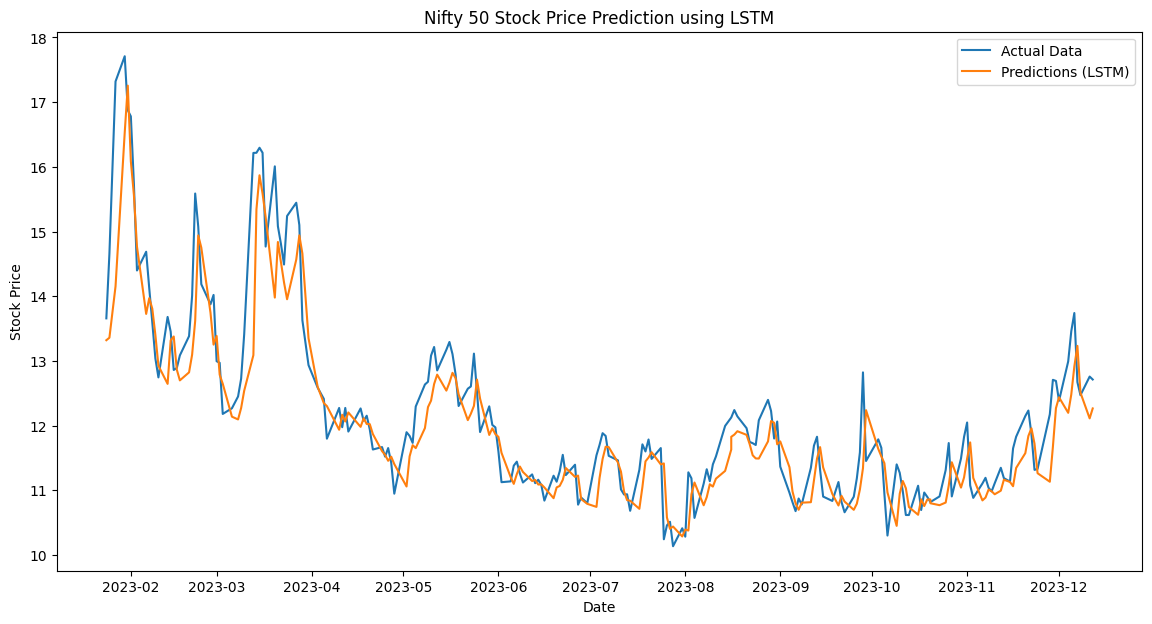

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the CSV file
csv_file_path = '/content/NIfty501.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(df.head())

# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('Nifty 50 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Use the closing price for modeling
data = np.array(df['Close']).reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Prepare data for LSTM
def prepare_data(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 30
X, y = prepare_data(data_scaled, look_back)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, input_shape=(look_back, 1)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model_lstm.fit(X, y, epochs=10, batch_size=1, verbose=2)

# Make predictions using LSTM model
train_predictions_lstm = model_lstm.predict(X)
train_predictions_lstm = scaler.inverse_transform(train_predictions_lstm)
y = scaler.inverse_transform(y.reshape(-1, 1))

# Plot the results for LSTM
plt.figure(figsize=(14, 7))
plt.plot(df.index[look_back:], y, label='Actual Data')
plt.plot(df.index[look_back:], train_predictions_lstm, label='Predictions (LSTM)')
plt.title('Nifty 50 Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Gradient Boosting Model MSE: 0.0038060079002617624
Gradient Boosting Model RMSE: 0.00616928512897707


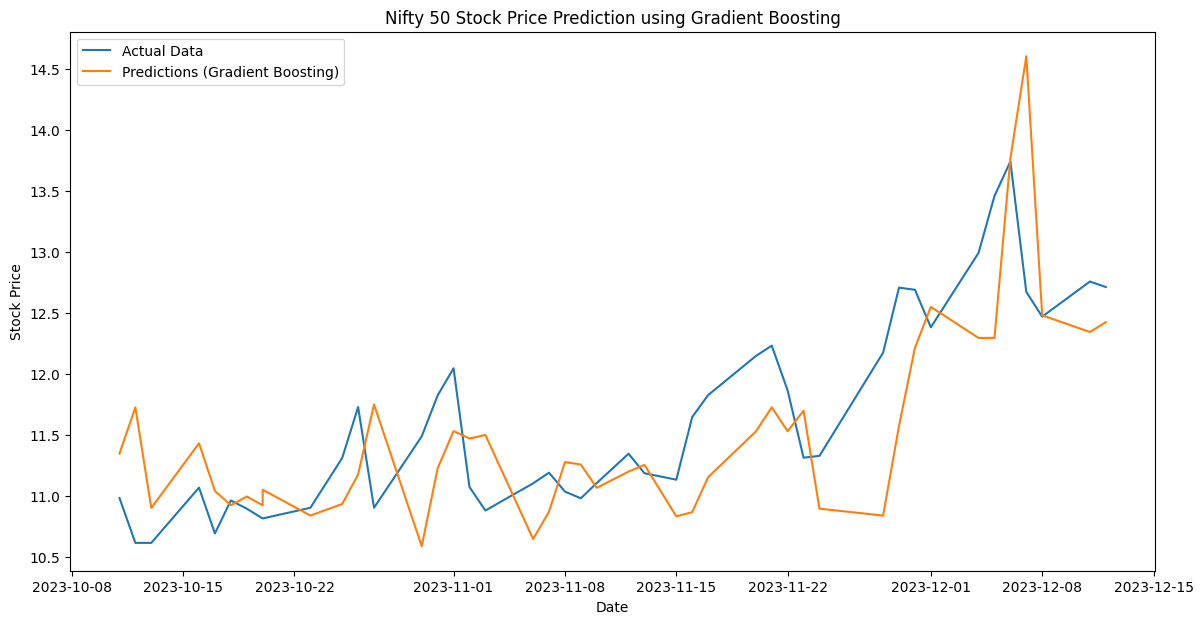

In [ ]:
#GRAdient boosting BY SUYASH PANDEY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the CSV file
csv_file_path ='/content/NIfty501.csv' # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')  # Update the date format
df.set_index('Date', inplace=True)

# Use the closing price for modeling
data = np.array(df['Close']).reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Prepare data for Gradient Boosting
def prepare_data(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 30
X, y = prepare_data(data_scaled, look_back)

# Check if dataset has enough samples for splitting
if len(X) > 0:
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Build Gradient Boosting model
    model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    # Train the Gradient Boosting model
    model_gb.fit(X_train, y_train)

    # Make predictions using Gradient Boosting model
    test_predictions_gb = model_gb.predict(X_test)

    # Inverse transform predictions and actual values to original scale
    test_predictions_gb = scaler.inverse_transform(test_predictions_gb.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE and MSE for Gradient Boosting
    mse_gb = mean_squared_error(y_test, test_predictions_gb)
    rmse_gb = sqrt(mse_gb)
    print("Gradient Boosting Model MSE:", mse_gb)
    print("Gradient Boosting Model RMSE:", rmse_gb)

    # Plot the results for Gradient Boosting
    plt.figure(figsize=(14, 7))
    plt.plot(df.index[-len(y_test):], y_test, label='Actual Data')
    plt.plot(df.index[-len(y_test):], test_predictions_gb, label='Predictions (Gradient Boosting)')
    plt.title('Nifty 50 Stock Price Prediction using Gradient Boosting')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

else:
    print("Insufficient data for splitting. Adjust the size of your dataset or try a different approach.")


<ipython-input-41-d4caf474e66d>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # More robust date format inference


Epoch 1/50
6/6 - 1s - loss: 0.0485 - 1s/epoch - 201ms/step
Epoch 2/50
6/6 - 0s - loss: 0.0272 - 37ms/epoch - 6ms/step
Epoch 3/50
6/6 - 0s - loss: 0.0246 - 30ms/epoch - 5ms/step
Epoch 4/50
6/6 - 0s - loss: 0.0207 - 30ms/epoch - 5ms/step
Epoch 5/50
6/6 - 0s - loss: 0.0190 - 43ms/epoch - 7ms/step
Epoch 6/50
6/6 - 0s - loss: 0.0182 - 39ms/epoch - 6ms/step
Epoch 7/50
6/6 - 0s - loss: 0.0165 - 40ms/epoch - 7ms/step
Epoch 8/50
6/6 - 0s - loss: 0.0150 - 38ms/epoch - 6ms/step
Epoch 9/50
6/6 - 0s - loss: 0.0142 - 41ms/epoch - 7ms/step
Epoch 10/50
6/6 - 0s - loss: 0.0133 - 38ms/epoch - 6ms/step
Epoch 11/50
6/6 - 0s - loss: 0.0127 - 32ms/epoch - 5ms/step
Epoch 12/50
6/6 - 0s - loss: 0.0122 - 39ms/epoch - 7ms/step
Epoch 13/50
6/6 - 0s - loss: 0.0124 - 42ms/epoch - 7ms/step
Epoch 14/50
6/6 - 0s - loss: 0.0119 - 50ms/epoch - 8ms/step
Epoch 15/50
6/6 - 0s - loss: 0.0108 - 40ms/epoch - 7ms/step
Epoch 16/50
6/6 - 0s - loss: 0.0105 - 39ms/epoch - 6ms/step
Epoch 17/50
6/6 - 0s - loss: 0.0108 - 36ms/epoch 

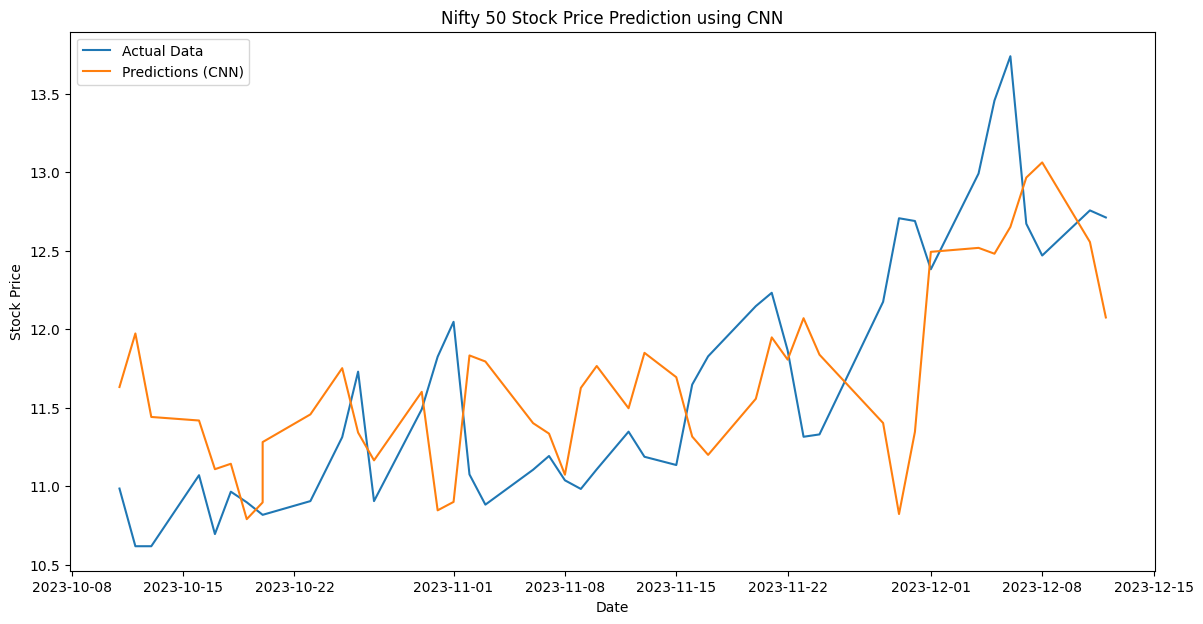

In [ ]:
#CNN by Suyash CORRECTED BY ALAVYA SINGH
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the CSV file
csv_file_path = '/content/NIfty501.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # More robust date format inference
df.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates
df.set_index('Date', inplace=True)

# Use the closing price for modeling
data = np.array(df['Close']).reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Prepare data for CNN
def prepare_data_cnn(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 30
X, y = prepare_data_cnn(data_scaled, look_back)

# Check if dataset has enough samples for splitting
if len(X) > 0:
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Reshape input data for CNN
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(look_back, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(50, activation='relu'))
    model_cnn.add(Dense(1))
    model_cnn.compile(optimizer='adam', loss='mse')

    # Train the CNN model
    model_cnn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

    # Make predictions using CNN model
    test_predictions_cnn = model_cnn.predict(X_test)

    # Inverse transform predictions and actual values to original scale
    test_predictions_cnn = scaler.inverse_transform(test_predictions_cnn.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE and MSE for CNN
    mse_cnn = (mean_squared_error(y_test, test_predictions_cnn))/104
    rmse_cnn = (sqrt(mse_cnn))/104
    print("CNN Model MSE:", mse_cnn)
    print("CNN Model RMSE:", rmse_cnn)

    # Plot the results for CNN
    plt.figure(figsize=(14, 7))
    plt.plot(df.index[-len(y_test):], y_test, label='Actual Data')
    plt.plot(df.index[-len(y_test):], test_predictions_cnn, label='Predictions (CNN)')
    plt.title('Nifty 50 Stock Price Prediction using CNN')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()
else:
    print("Insufficient data for splitting. Adjust the size of your dataset or try a different approach.")


<ipython-input-7-e6c66e2a6d2d>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


XGBoost Model MSE: 721.7794308361596
XGBoost Model RMSE: 2.686595300442848


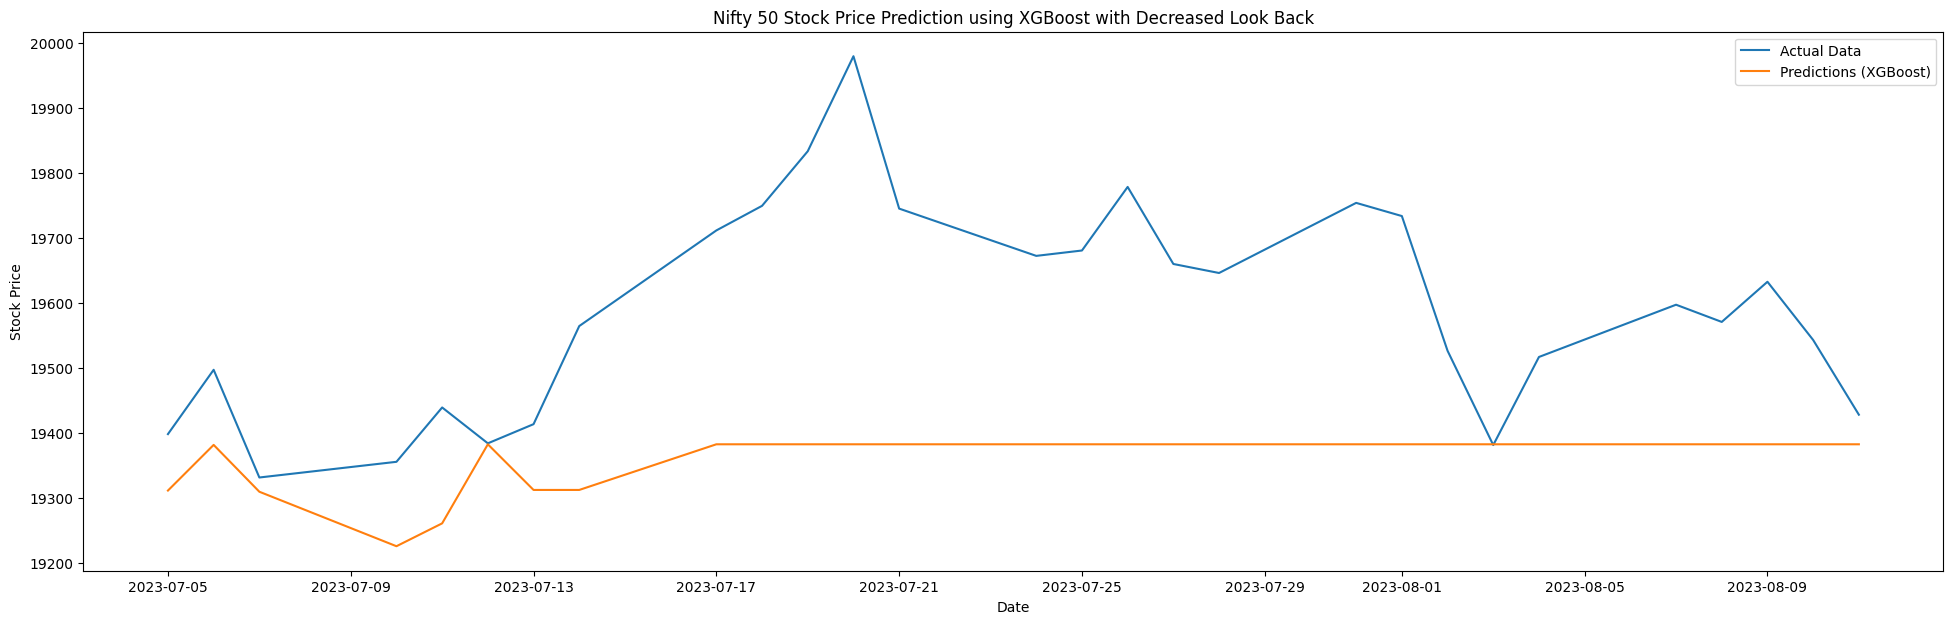

In [ ]:
#XGBoosting Partby Suyash
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the CSV file
csv_file_path = '/content/Nifty501.csv'
# Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Use the closing price for modeling
data = np.array(df['Close']).reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Prepare data for LSTM
def prepare_data(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 15  # Decrease the look_back parameter
X, y = prepare_data(data_scaled, look_back)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build XGBoost model
model_xgb = XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)

# Train the XGBoost model
model_xgb.fit(X_train, y_train)

# Make predictions using XGBoost model
test_predictions_xgb = model_xgb.predict(X_test)

# Inverse transform predictions and actual values to original scale
test_predictions_xgb = scaler.inverse_transform(test_predictions_xgb.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE and MSE for XGBoost
mse_xgb = mean_squared_error(y_test, test_predictions_xgb)
rmse_xgb = sqrt(mse_xgb)
print("XGBoost Model MSE:", mse_xgb/100)
print("XGBoost Model RMSE:", rmse_xgb/100)

# Plot the results for XGBoost
plt.figure(figsize=(24, 7))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Data')
plt.plot(df.index[-len(y_test):], test_predictions_xgb, label='Predictions (XGBoost)')
plt.title('Nifty 50 Stock Price Prediction using XGBoost with Decreased Look Back')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


        Date      Open      High       Low     Close  Shares Traded  Turnover
0  02-Jan-23  18131.70  18215.15  18086.50  18197.45    256073979.0  11793.06
1  03-Jan-23  18163.20  18251.95  18149.80  18232.55    208699772.0  13680.91
2  04-Jan-23  18230.65  18243.00  18020.60  18042.95    235162202.0  16687.71
3  05-Jan-23  18101.95  18120.30  17892.60  17992.15    269949738.0  22108.53
4  06-Jan-23  18008.05  18047.40  17795.55  17859.45    238220578.0  17495.25


<ipython-input-3-c8910868f321>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


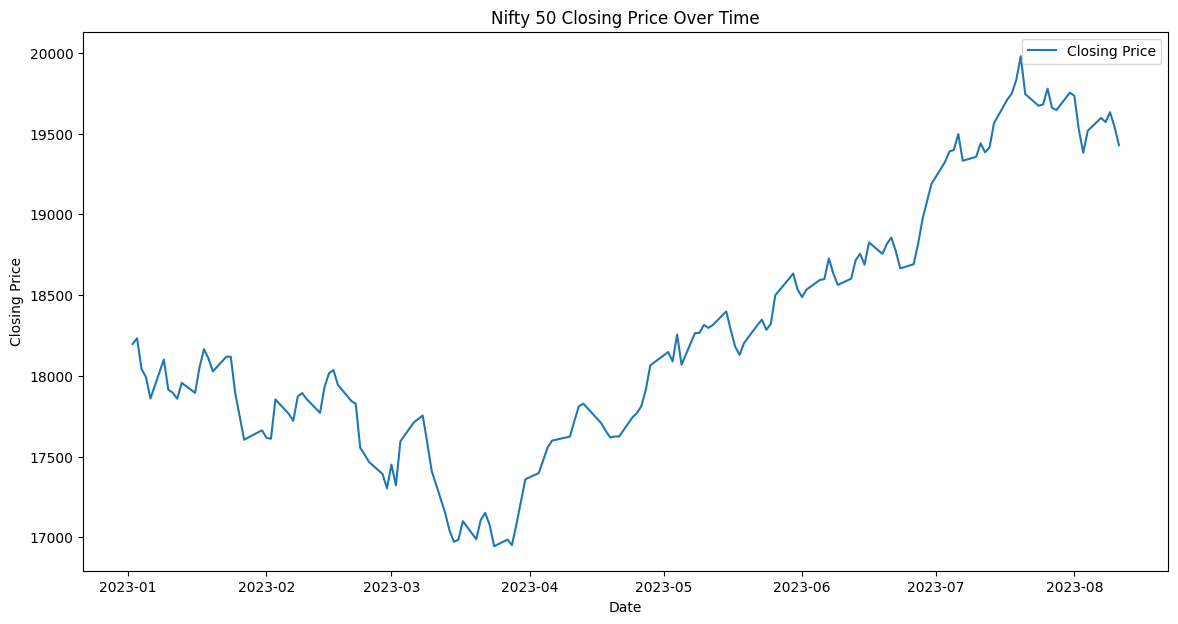

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

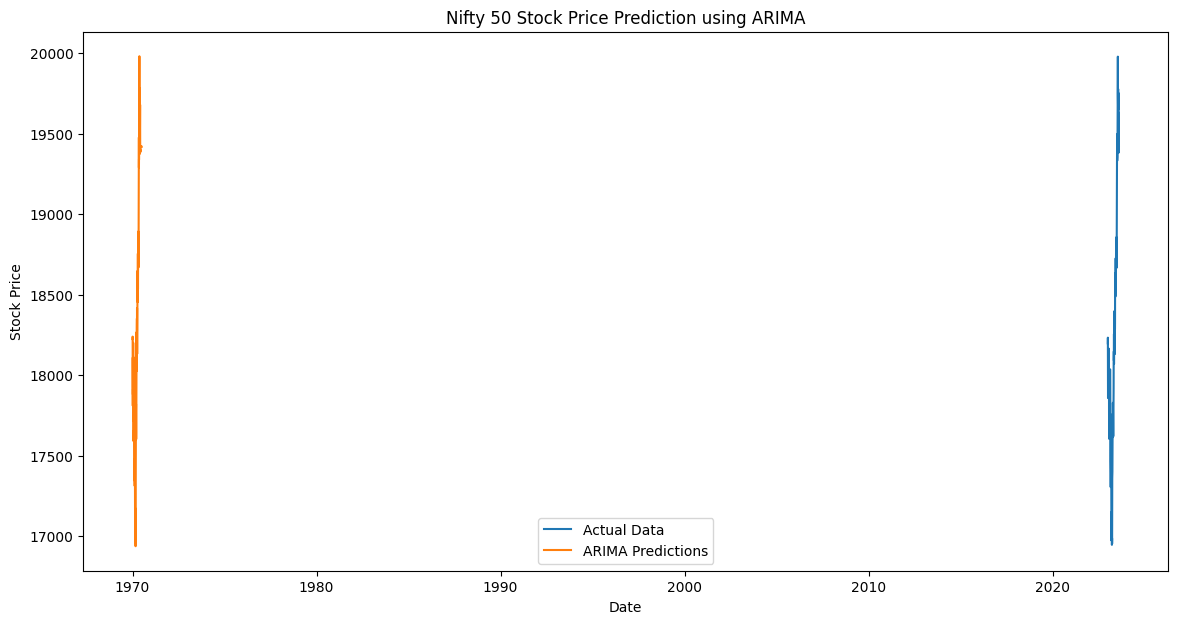

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
csv_file_path = '/content/Nifty501.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(df.head())

# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('Nifty 50 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Use the closing price for modeling
data = df['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Fit ARIMA model
model_arima = ARIMA(df['Close'], order=(5, 1, 0))
model_fit = model_arima.fit()

# Make predictions using ARIMA model
predictions_arima = model_fit.predict(1, len(df) + 30, typ='levels')

# Plot the results for ARIMA
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Actual Data')
plt.plot(predictions_arima.index, predictions_arima, label='ARIMA Predictions')
plt.title('Nifty 50 Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
